# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.4.4
matplotlib: 3.5.2



In [4]:
# Carrega o dataset
df_raw = pd.read_csv('previsao_de_renda.csv')

In [5]:
# Shape
df_raw.shape

(15000, 16)

In [6]:
# Colunas
df_raw.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [7]:
# Amostra dos dados
df_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [8]:
# Info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [25]:
sns.set(style="darkgrid")

Text(0.5, 1.0, 'Posse de Imóvel x Renda')

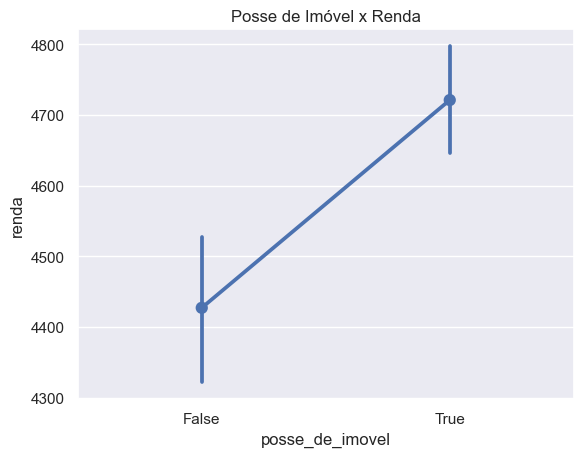

In [26]:
# PLot posse de imovel x renda
ax = sns.pointplot(x = 'posse_de_imovel', y = 'renda', data = df_raw, dodge = True, ci = 90)
plt.title('Posse de Imóvel x Renda')

Text(0.5, 1.0, 'Posse de Veículo x Renda')

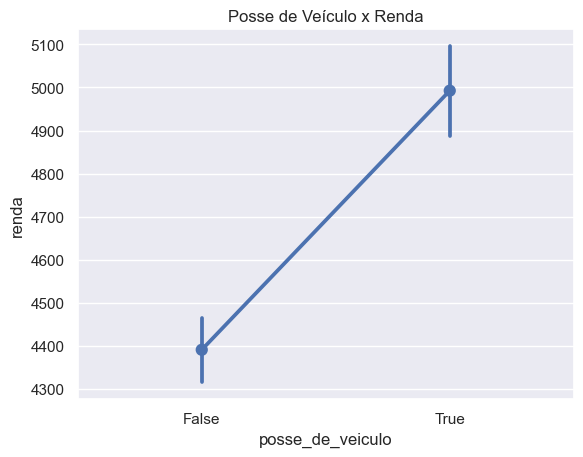

In [27]:
# Plot posse de veículo x renda
ax = sns.pointplot(x = 'posse_de_veiculo', y = 'renda', data = df_raw, dodge = True, ci = 90)
plt.title('Posse de Veículo x Renda')

In [28]:
# Cria uma nova coluna que também analisará caso o cliente possua ambos imóveis e veículo
df_raw['posse_ambos'] = np.where((df_raw['posse_de_veiculo'] == True) & (df_raw['posse_de_imovel'] == True),
                                    'posse_ambos', 
                                    np.where((df_raw['posse_de_veiculo'] == True) & (df_raw['posse_de_imovel'] == False),
                                    'apenas_veiculo', 
                                    np.where((df_raw['posse_de_veiculo'] == False) & (df_raw['posse_de_imovel'] == True),
                                    'apenas_imovel', 
                                    'nao_possui')))

Text(0.5, 1.0, 'Posse de Imóvel e Veículo x Renda')

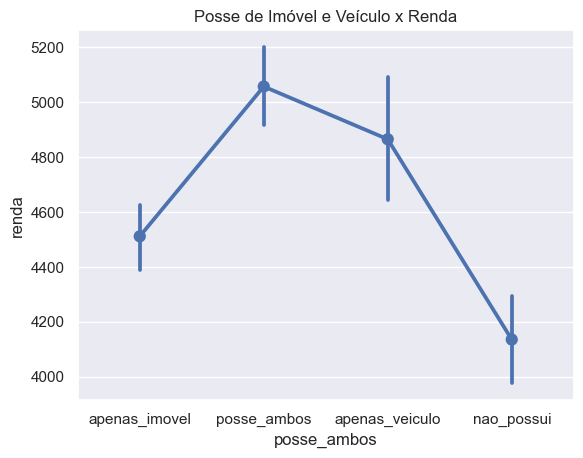

In [29]:
# Plot Possui Imovel e Veículo x Renda
ax = sns.pointplot(x="posse_ambos", y="renda", data=df_raw, dodge=True, ci = 95)
plt.title('Posse de Imóvel e Veículo x Renda')

## Análise

Podemos observar nos gráficos que tanto `posse_de_veiculo` como `posse_de_imovel` são boas preditoras para a variável `renda`. Sendo que `posse_de_imovel` é estatisticamente menos significante.

Na variável `posse_ambos`, combinanos as duas variáveis `posse_de_veiculo` e `posse_de_imovel`, nela encontramos uma variável que é uma boa preditora para a variável `renda` e estatisticamente mais significante que as variáveis `posse_de_veiculo` e `posse_de_imovel` analisadas separadamente.